Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем).

In [1]:
import pandas as pd
import os

In [2]:
path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/shared/homeworks/python_ds_miniprojects/4/data/'

In [4]:
#создание датафрейма по вложенным циклам
df_b = pd.DataFrame()
df = pd.DataFrame()
#пробегаемся внутри директории python_ds_miniprojects/4/data/
for i in os.listdir(path):
    #создаем новый адрес path_folder, содержащий адрес каждой вложенной папки адреса (по итерациям)
    path_folder = path + i + '/'
    #пробегаемся по каждому новому адресу path_folder
    for a in os.listdir(path_folder):    
        #создаем новый адрес full_path, содержащий адрес даты и пользователя для этой даты
        full_path = path_folder + a +'/'
        #пробегаемся по каждой папке для пользователя и даты
        for j in os.listdir(full_path):       
            #создаем адрес csv файла
            csv_path = full_path + j
            #записываем в пустой датафрейм(df_b) содержание файла csv (информация для конкретного пользователя и конкретной даты)
            df_b = pd.read_csv(csv_path)
            #с помощью split() получаем информацию о дате и записываем в новою колонку датафарейма(df_b)
            df_b['date'] = path_folder.split('/')[-2]
            #с помощью split() получаем информацию о имени и записываем в новою колонку датафарейма(df_b)
            df_b['name'] = full_path.split('/')[-2]
            #c помощью pd.concat([]) соединяем все маленькие датафреймы в один большой
            df = pd.concat([df,df_b])
#убираем индексы и ненужные колонки            
df = df.drop(columns = 'Unnamed: 0').reset_index().drop(columns = 'index')
#преобразовываем строку даты в формат даты
#df['date'] = pd.to_datetime(df['date'])

In [5]:
df

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...
156,18,4,2020-12-07,Petr_Fedorov
157,94,4,2020-12-07,Petr_Fedorov
158,95,2,2020-12-07,Vasiliy_Ivanov
159,83,3,2020-12-07,Vasiliy_Ivanov


В качестве ответа укажите сумму по колонке quantity.

In [21]:
text = '''We have several emails - vasya@yandex.ru, katya_ivanova@gmail.com,
sasha@karpov.courses.com and also masha@gmail.com'''

pattern.findall(text)
['yandex.ru', 'gmail.com', 'karpov.courses.com', 'gmail.com']

['yandex.ru', 'gmail.com', 'karpov.courses.com', 'gmail.com']

In [24]:
text = '+7-921-000-00-00 +7-981-555-55-55'

pattern = re.compile('\d\d')
pattern.findall(text)

['92', '00', '00', '00', '98', '55', '55', '55']

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [15]:
df.groupby('name',as_index = False)\
    .agg({'quantity':'sum'})\
    .sort_values('quantity',ascending = False)


,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
19,Vasiliy_Ivanov,33
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:

по оси x – идентификаторы товаров (product_id) 
по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)
Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order). 

В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56.

In [26]:
df_top_10 = df.groupby('product_id',as_index = False)\
    .agg({'quantity':'sum'})\
    .sort_values('quantity', ascending = False)\
    .head(10) 

In [28]:
df_top_10

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
59,83,12


In [27]:
import seaborn as sns

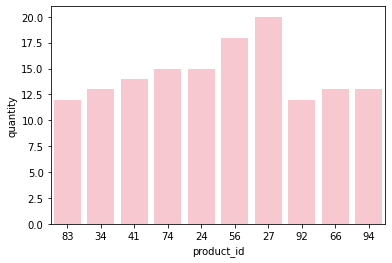

In [40]:
sns.barplot(x = df_top_10.product_id, y = df_top_10.quantity, color = 'pink', alpha = 1, order = [83,34,41,74,24,56,27,92,66,94])

Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date).

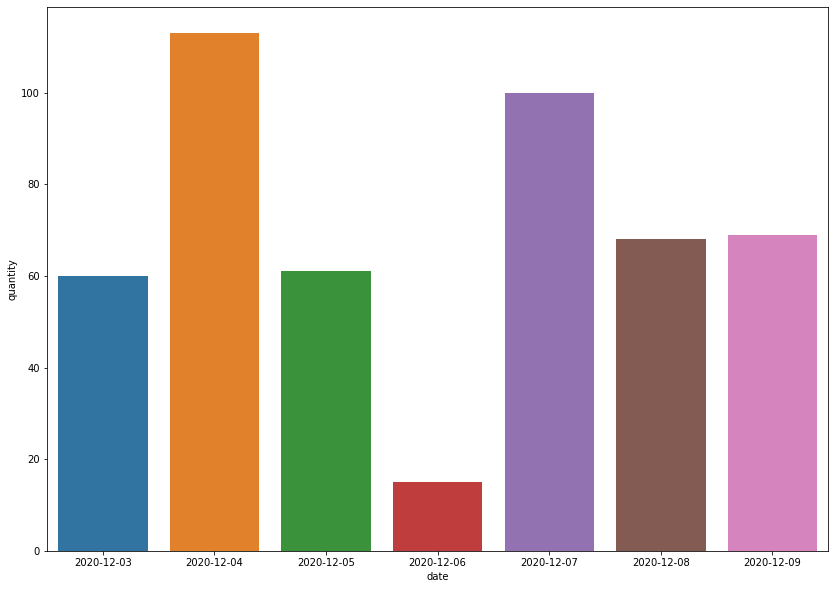

In [81]:
#импортируем pyplot
from matplotlib import pyplot as plt
#изменяем размер графика
plt.figure(figsize=(14, 10))
#создаем датафрейм - день и количество покупок в этот день
df_day = df.groupby('date', as_index= False)\
    .agg({'quantity':'sum'})
#строим график по нужным колонкам и аргументом oder для порядкового вывода
sns.barplot(x = df_day.date, y = df_day.quantity, order = ['2020-12-03', '2020-12-04','2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09'])

💀 Сложное задание! 💀

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

Например, пользователь Sasha Tsarev дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.
Может пригодиться: .drop_duplicates()
df.drop_duplicates(subset=['Date', 'Last'])

Ищем пользователей с одним id_product и разными date

In [132]:
#убираем из БД людей, которые купили тот же товар в один день
df_new = df.drop_duplicates(subset=['product_id','date','name']) 

In [163]:
#группируем по имени и продукту, считаем количество дней(дат), за которые связка имя-продукт совершило такую покупку
#отсеиваем значения >1 (по условию задачи)
#считаем количество получившихся строк(имен)
df_new.groupby(['name', 'product_id'], as_index = False)\
    .agg({'date':'count'})\
    .query("date > 1")\
    .value_counts('name')\
    .sum()

2

И небольшой минипроект на фильтрацию данных!

Имеется таблица с записями о компаниях, включая их ИНН, и отдельный текстовый файл с набором ИНН (колонка head_inn), которые хранятся в папке 4_inn.

inn.xls — таблица в экселевском формате
necessary_inn.txt — перечень необходимых ИНН в текстовом формате
Задачи:
извлечь из таблицы записи с ИНН, указанными в текстовом файле
записать результат в файл selected_inn.csv

In [6]:
df = pd.read_excel('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/4_inn.xls') # lines is a list with lines from the file

In [40]:
df_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/4_necessary_inn.txt',header=None)
df_2 = df_2.rename(columns = {0:'inn'})

In [47]:
values = df_2['inn'].values.tolist()

In [55]:
df.query('head_inn in @values').to_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/selected_inn.csv')


In [56]:
df_3 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/selected_inn.csv')

In [57]:
df_3

,Unnamed: 0,Unnamed: 0.1,#,name,reg_number,address,head,head_job,head_inn,phone,...,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
0,47,47,47,Пермэнергосбыт,6417532956774,"ст. Слюдянка, пер. Брянский, д. 378 стр. 634, ...",Емельян Феликсович Зайцев,Релайтер,175482780898,8 833 729 83 14,...,krilova.net,1986-03-20,1998-02-11,47158105405,10234283083,Novosilikatnyy,"г. Кропоткин (Краснод.), пр. Лесный, д. 8/3 к....",Разработка подробных результатов,44637351562,67534335517
1,76,76,76,ЗАО «Кабанова Ковалев»,9343329412518,"с. Нарткала, ул. Верхняя, д. 68 стр. 1, 393309",Геннадий Денисович Григорьев,Бондарь,120708914823,+7 455 632 1053,...,ao.ru,2011-09-28,1983-11-10,20653722407,92544205998,Severodvinsk,"д. Москва, МГУ, бул. Транспортный, д. 75 стр. ...",Монетизация передовых действий,78570288945,19932336080
2,77,77,77,Неофарм,3813743111150,"г. Долинск, ш. Московское, д. 25 к. 5, 227970",Юрий Архипович Богданов,Полицейский,663119569897,+7 077 854 47 31,...,ao.com,2019-01-30,1986-09-01,96067740308,47030638090,Kovylkino,"с. Сладково, наб. Вавилова, д. 62 к. 627, 198606",Эксплуатация круглосуточных пользователей,30634104861,3103853229
3,85,85,85,Арконик СМЗ,7465966885549,"п. Тобольск, ул. Лунная, д. 375 стр. 724, 119588",Аникей Артёмович Павлов,Оперативный работник,722903871682,8 120 448 48 45,...,ao.com,2004-08-10,2012-04-01,79166677871,45647356291,Otradnyy,"клх Миасс, пер. Тургенева, д. 4/2 к. 8, 505443",Использование серверных диапазонов,85286893329,8607813826
4,90,90,90,Фармперспектива,6205521489390,"к. Горно-Алтайск, ул. Степана Разина, д. 646 с...",Шашков Алексей Богданович,Фортификатор,837771137752,88711723244,...,npo.biz,1982-05-29,1981-10-10,13185275127,67033649508,Ishim,"клх Кунгур, ш. Запрудное, д. 13, 038583",Максимизация мультимедийных интерфейсов,88304638400,29181260019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2059,2059,2059,"ЗАО «Кабанова, Титов и Бирюкова»",4405157155853,"клх Щелково, наб. Некрасова, д. 518, 873237",Варлаам Елисеевич Емельянов,Инженер-конструктор,575198252501,+7 (038) 371-4551,...,abb.net,2006-11-18,2016-02-29,78655694400,49188723218,Valday,"п. Курск, пер. Восьмого Марта, д. 7, 831314",Синхронизация круглосуточных пользователей,97034714796,9608612080
111,2074,2074,2074,"ООО «Фомин, Симонова и Никифорова»",9213736030860,"к. Курск, ш. Баумана, д. 4 к. 3/4, 468572",Антип Антонович Смирнов,Радиолог,270813334693,+70989264802,...,rao.com,1999-07-31,2009-02-27,51955852862,98399872283,Privolzhskiy,"п. Кашхатау, ш. Базарное, д. 66 стр. 5, 004721",Перезагрузка B2C действий,77532182557,7246816762
112,2089,2089,2089,НПО «Зимин Иванов»,6791957421599,"п. Апрелевка, пер. Поселковый, д. 12 стр. 9, 9...",Муравьев Константин Игнатович,Географ,124852843647,8 160 092 8516,...,npo.edu,2001-11-16,2010-10-03,83247763843,43244910008,Gudermes,"п. Камышлов, ул. Фабричная, д. 2, 994773",Развитие популярных интернет-компаний,53149780410,48323910899
113,2106,2106,2106,Юдина Лтд,5012825137426,"д. Темрюк, ш. Автомобилистов, д. 9 стр. 59, 80...",Игнатов Кирилл Арсенович,Прозектор,703895742672,+7 854 489 5577,...,npo.net,1973-08-13,2001-11-09,40544984216,35386922447,Tver,"к. Мыс Шмидта, алл. Комарова, д. 257 стр. 3, 8...",Увеличение кроссплатформенных действий,20441750025,67450329265


В качестве проверки укажите сумму колонки income,RUB в отобранных данных.

NB! У этого набора данных нет заголовка, поэтому вам пригодится аргумент header=None. 

In [60]:
income = df_3['income,RUB'].sum()

In [61]:
income

6104522627393